In [ ]:
#KO H02T01
#siemenaineiston käsittelyä
#klusterien määrä on kasvien määrä eli kolme

In [7]:
import pandas as pd

#luetaan data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df = pd.read_csv(url, delim_whitespace=True, header=None)

#attribuutit
df.columns = ['area A',
              'perimeter P',
              'compactness C = 4*pi*A/P^2',
              'length of kernel',
              'width of kernel',
              'asymmetry coefficient',
              'length of kernel groove',
              'type']

print(df)

     area A  perimeter P  compactness C = 4*pi*A/P^2  length of kernel  \
0     15.26        14.84                      0.8710             5.763   
1     14.88        14.57                      0.8811             5.554   
2     14.29        14.09                      0.9050             5.291   
3     13.84        13.94                      0.8955             5.324   
4     16.14        14.99                      0.9034             5.658   
..      ...          ...                         ...               ...   
205   12.19        13.20                      0.8783             5.137   
206   11.23        12.88                      0.8511             5.140   
207   13.20        13.66                      0.8883             5.236   
208   11.84        13.21                      0.8521             5.175   
209   12.30        13.34                      0.8684             5.243   

     width of kernel  asymmetry coefficient  length of kernel groove  type  
0              3.312              

In [ ]:
#KO H02T02
#datan visualisointi seabornin pairplotilla

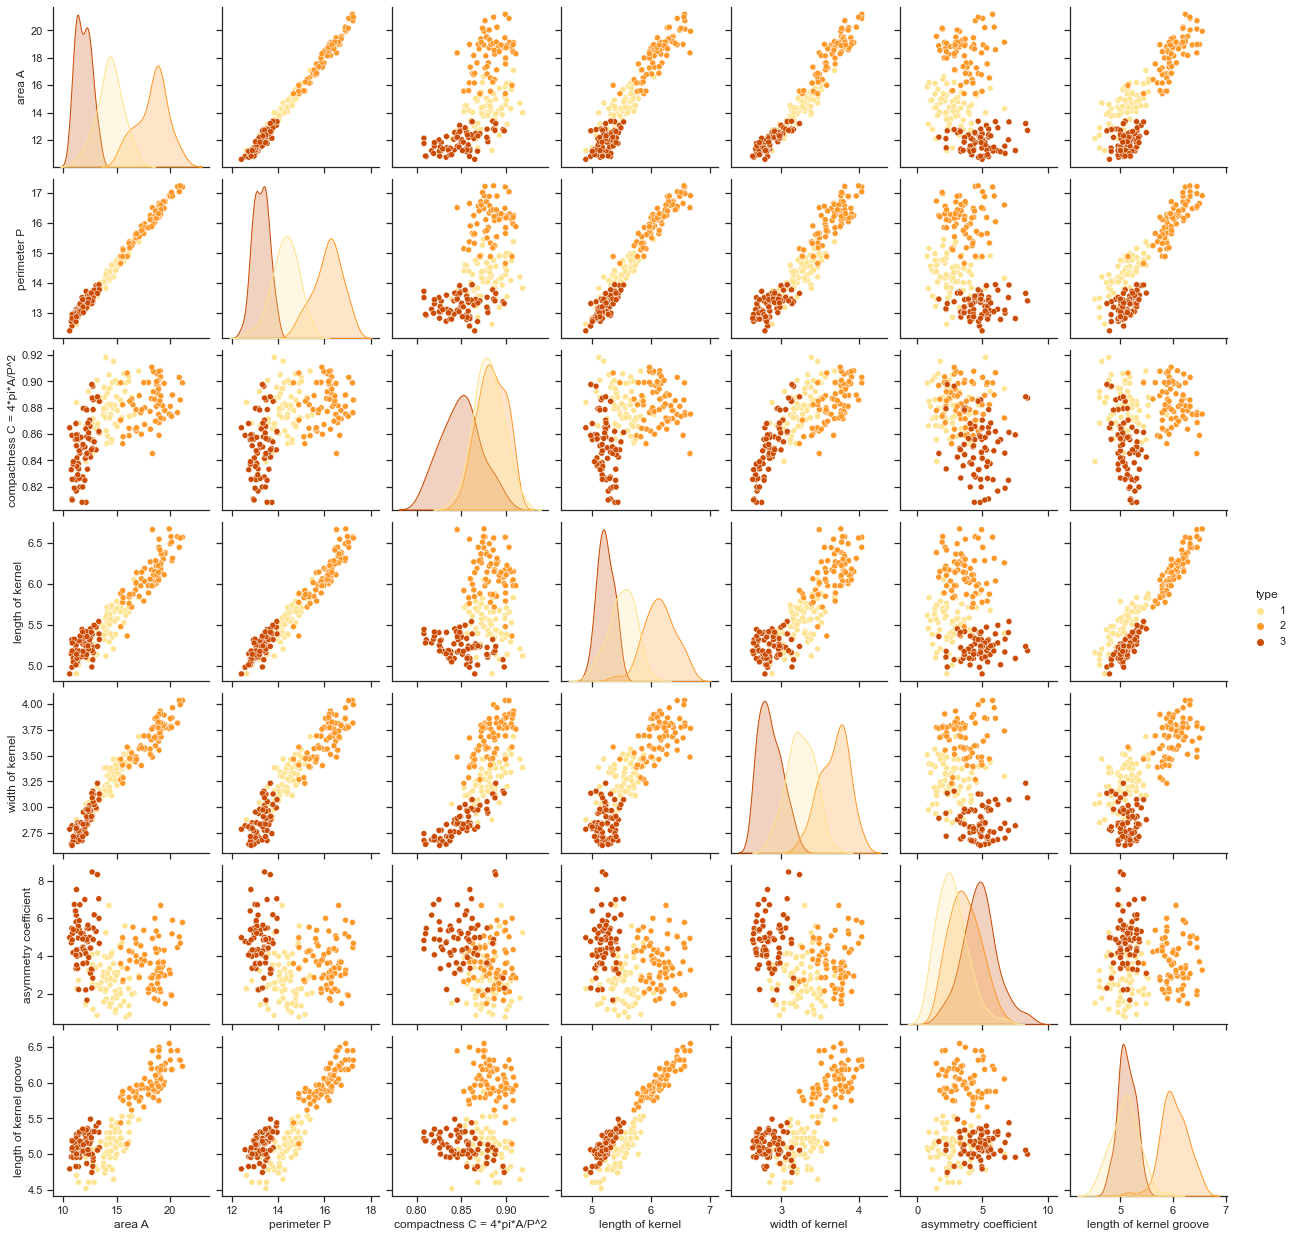

In [19]:
import seaborn as sns

#datan tarkasteluun valitaan kauniin viljaisa värimaailma
colors = sns.color_palette('YlOrBr', n_colors=3)
ax = sns.pairplot(df, hue='type', palette=colors)


In [ ]:
#KO H02T03
#klusterointi k-means menetelmällä

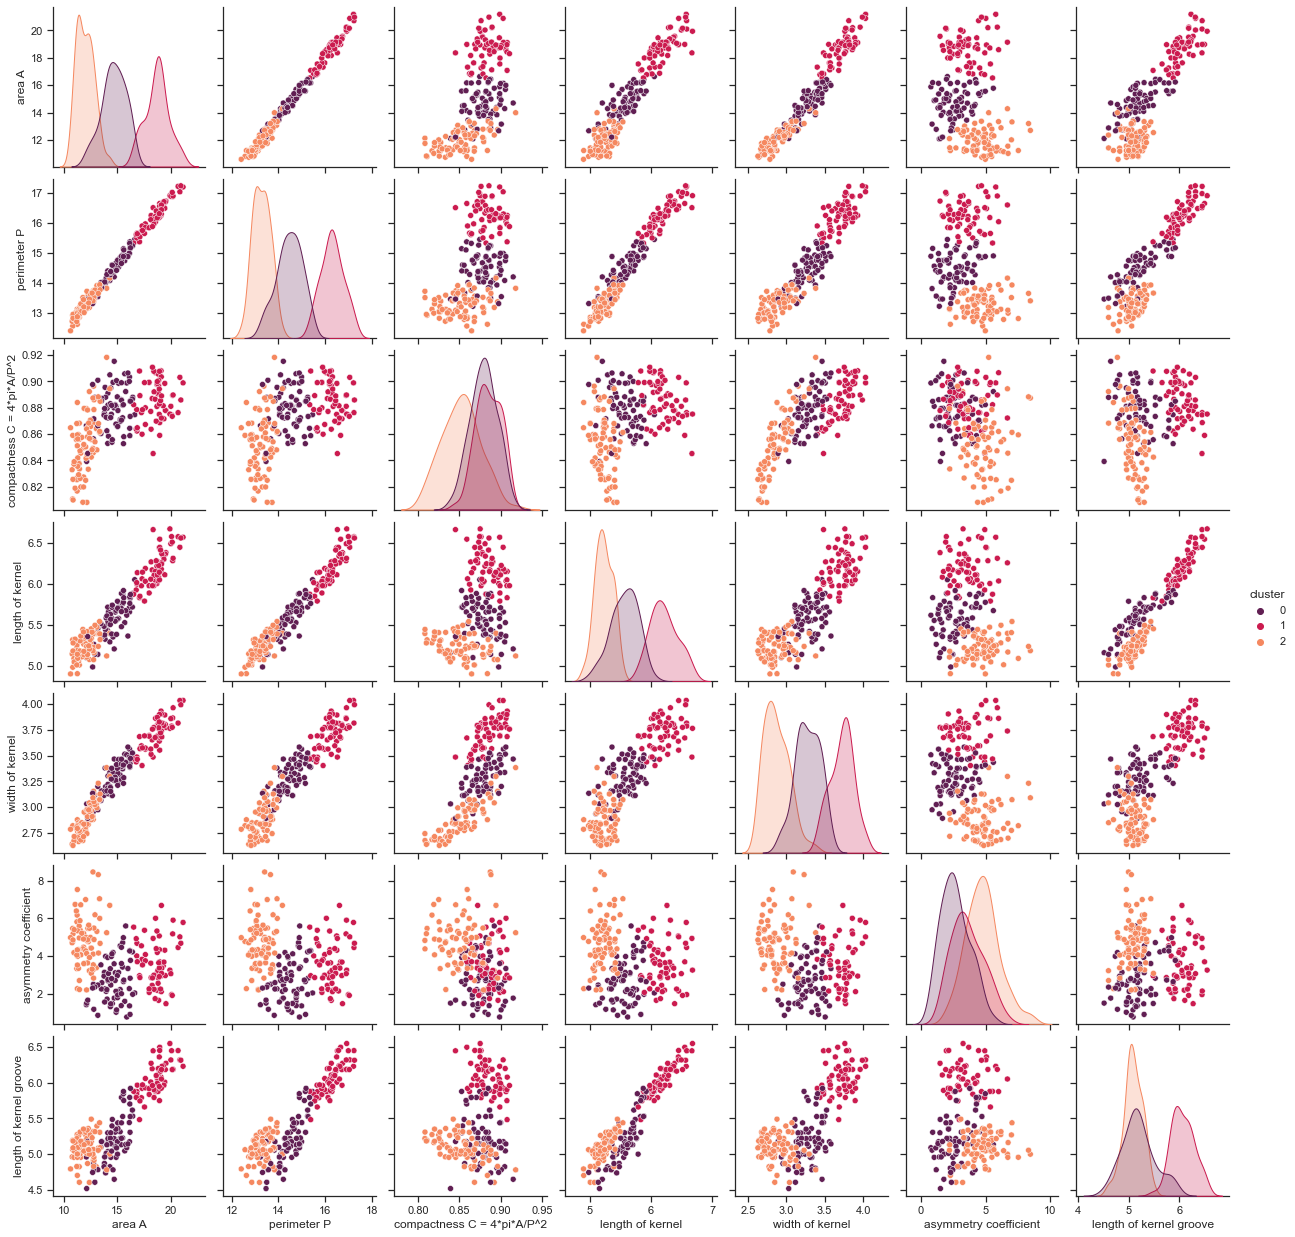

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#aluksi otetaan luokkamuuttuja irralleen
X = df.drop(columns='type')
y = df['type']

#jaetaan data treenaus ja testisetteihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fitataan k-means
kmean = KMeans(n_clusters=3)
kmean.fit(X)

#ennustetaan luokka
df['cluster'] = kmean.predict(X)

#sitten taas visualisoidaan
#otetaan modernin tekniikan ihmeeseen rakettivärit :D
colors = sns.color_palette('rocket', n_colors=3)
ax = sns.pairplot(X, hue='cluster', palette=colors)